In [ ]:
pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=b4275267dd0a54bd3d1490b42c3f737ea5222a4fd7808a7496ef1019b0e0f40b
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
 

In [ ]:
import pandas as pd
from textblob import TextBlob
from googletrans import Translator

In [ ]:
def translateComment (strComment:str):
    translator =Translator()
    strEngComment = translator.translate(strComment, src='es', dest='en')
    return strEngComment.text

def getPolarity (strComment:str):
    strComment = translateComment(strComment)
    analysis = TextBlob(strComment)
    return analysis.sentiment.polarity

In [ ]:
# cargamos el dataset
df = pd.read_csv('Comentarios.csv')
df['polaridad'] = df['Comentario'].apply(getPolarity)

In [ ]:
df.to_csv('resultados.csv', index=False)

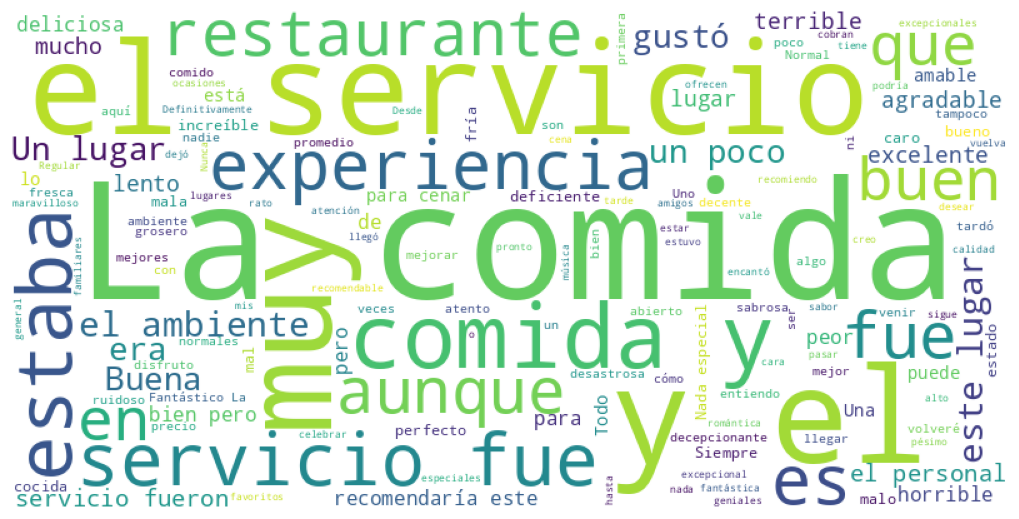

In [ ]:
# prompt: generar una nube de palabras con el dataset comentarios

!pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combinar todos los comentarios en una sola cadena
text = " ".join(review for review in df.Comentario)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [ ]:
# prompt: Explicar codigo anterior

# Explicación del código anterior:

# 1. Importación de bibliotecas:
#    - pandas (pd): para la manipulación y análisis de datos.
#    - textblob: para el análisis de sentimientos.
#    - googletrans: para la traducción de texto.
#    - matplotlib.pyplot (plt): para la visualización de gráficos.
#    - wordcloud: para la creación de nubes de palabras.

# 2. Instalación de googletrans:
#    - pip install googletrans==3.1.0a0: instala la versión específica de googletrans.

# 3. Función translateComment:
#    - Recibe un comentario como entrada (strComment).
#    - Crea un objeto Translator de googletrans.
#    - Traduce el comentario del español (src='es') al inglés (dest='en').
#    - Retorna el comentario traducido al inglés.

# 4. Función getPolarity:
#    - Recibe un comentario como entrada (strComment).
#    - Traduce el comentario al inglés usando la función translateComment.
#    - Crea un objeto TextBlob con el comentario traducido.
#    - Calcula la polaridad del sentimiento del comentario usando analysis.sentiment.polarity.
#    - Retorna la polaridad del comentario.

# 5. Carga del dataset:
#    - df = pd.read_csv('Comentarios.csv'): carga un archivo CSV llamado 'Comentarios.csv' en un DataFrame de pandas.

# 6. Cálculo de la polaridad para cada comentario:
#    - df['polaridad'] = df['Comentario'].apply(getPolarity): aplica la función getPolarity a cada comentario en la columna 'Comentario' y guarda el resultado en una nueva columna 'polaridad'.

# 7. Guardar los resultados:
#    - df.to_csv('resultados.csv', index=False): guarda el DataFrame con la columna 'polaridad' en un nuevo archivo CSV llamado 'resultados.csv'.

# 8. Crear la nube de palabras:
#    - text = " ".join(review for review in df.Comentario): combina todos los comentarios del DataFrame en una sola cadena de texto.
#    - wordcloud = WordCloud(...).generate(text): crea un objeto WordCloud y genera la nube de palabras a partir de la cadena de texto.
#    - Los parámetros width, height, y background_color configuran el tamaño y el color de fondo de la nube.

# 9. Mostrar la nube de palabras:
#    - plt.figure(...): crea una figura para la visualización.
#    - plt.imshow(wordcloud): muestra la nube de palabras.
#    - plt.axis("off"): oculta los ejes.
#    - plt.tight_layout(...): ajusta el diseño de la figura.
#    - plt.show(): muestra la figura.


In [ ]:

# Contar los comentarios buenos y malos
positivos = df[df['polaridad'] > 0].shape[0]
negativos = df[df['polaridad'] < 0].shape[0]
neutros = df[df['polaridad'] == 0].shape[0]

print(f"Comentarios positivos: {positivos}")
print(f"Comentarios negativos: {negativos}")
print(f"Comentarios neutros: {neutros}")


Comentarios positivos: 43
Comentarios negativos: 28
Comentarios neutros: 0


In [ ]:
# Función casificar el sentimiento
def classifySentiment(polarity: float):
    if polarity > 0:
        return 'Positivo'
    elif polarity < 0:
        return 'Negativo'
    else:
        return 'Neutral'

# Aplicando la función de polaridad y clasificar el sentimiento
df['Polaridad'] = df['Comentario'].apply(getPolarity)  # Aplica función de polaridad
df['Sentimiento'] = df['Polaridad']

<ipython-input-14-9263c086f101>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When g

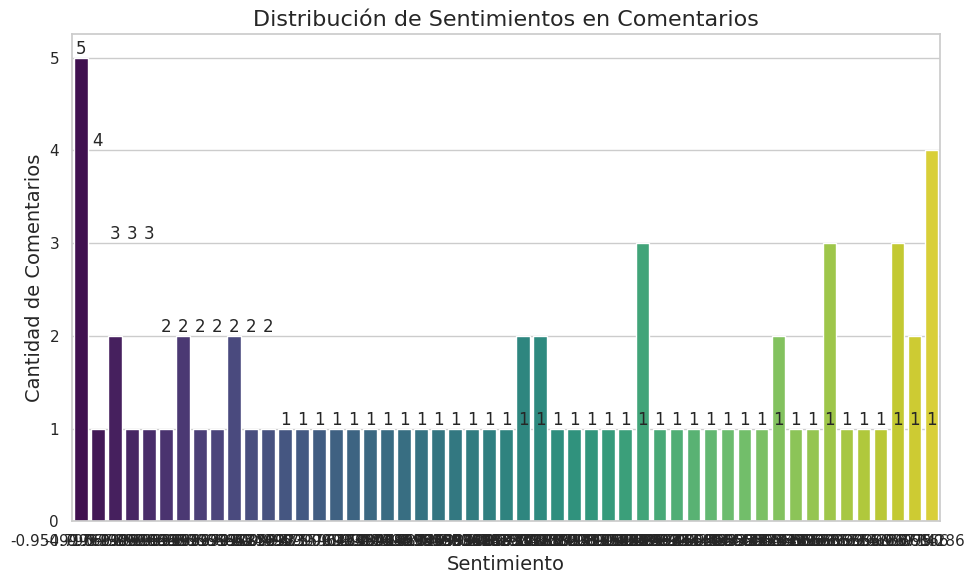

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
# cuenta cantidad de comentarios en cada categoría de sentimiento
sentiment_counts = df['Sentimiento'].value_counts()

#grafico
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Distribución de Sentimientos en Comentarios', fontsize=16)
plt.xlabel('Sentimiento', fontsize=14)
plt.ylabel('Cantidad de Comentarios', fontsize=14)
# valores en las barras
for index, value in enumerate(sentiment_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

# GRAFICO
plt.tight_layout()
plt.show()